In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
plt.style.use('fivethirtyeight')


In [4]:
import sklearn
print("Current version:", sklearn.__version__)

Current version: 1.5.1


In [5]:
path = "/content/drive/MyDrive/Dataset/measures_v2.csv"
df = pd.read_csv(path)



In [6]:
df = df.drop('profile_id', axis=1)

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
dtype: int64


In [20]:
X = df.drop(columns=['motor_speed'])
y = df['motor_speed']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [22]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Fit the scaler on the testing data and transform it
X_test_scaled = scaler.transform(X_test)


In [23]:

def predict(model):
    print('Model: {}'.format(model))

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error:', mse)

    r2 = r2_score(y_test, y_pred)
    print('R^2 Score:', r2)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print('Mean Absolute Error:', mae)

    # Calculate Root Mean Squared Error (RMSE)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print('Root Mean Squared Error:', rmse)

    sns.displot(y_test - y_pred)




Model: LinearRegression()
Mean Squared Error: 219171.53627767944
R^2 Score: 0.9366687461044592
Mean Absolute Error: 342.6256035163838
Root Mean Squared Error: 468.1575976929985


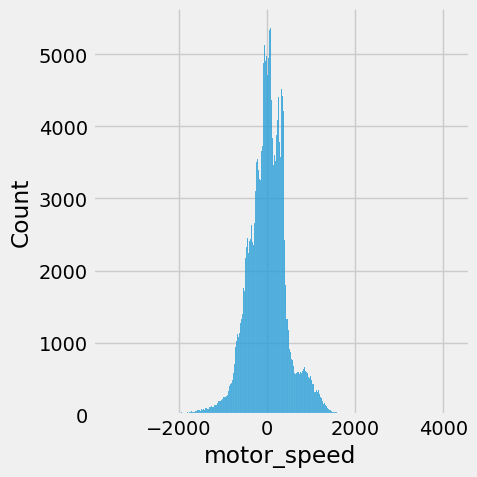

In [31]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)


predictions = model.predict(X_test_scaled)

predict(model)

In [32]:
import pickle


In [33]:
filename = 'model.sav'
pickle.dump(model, open(filename, "wb"))
load_model = pickle.load(open(filename, "rb"))
r = load_model.score(X_test_scaled, y_test)
r

0.9366687461044592

In [34]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_test_scaled_df.head())

        u_q   coolant  stator_winding       u_d  stator_tooth       i_d  \
0 -1.134610 -0.823162       -1.635300  0.422012     -1.663889  1.027815   
1  0.307401  0.621040        0.889371 -1.382475      0.876138 -0.203233   
2  1.744870  0.597837        0.431288  0.420254      0.595452  0.407569   
3  1.748967 -0.471915       -0.084632  0.350735     -0.117754  0.114160   
4 -0.956065 -0.823603       -1.622984  0.410670     -1.641504  1.027807   

        i_q        pm  stator_yoke   ambient    torque  
0 -0.394145 -1.850233    -1.480071 -0.804601 -0.397851  
1  1.619112  0.375505     0.842586  0.385006  1.540947  
2 -0.434233  0.688833     0.623744  0.308841 -0.442139  
3 -0.401979 -0.147407    -0.271088  0.921321 -0.411560  
4 -0.394143 -1.706251    -1.457028 -0.675582 -0.402017  


In [35]:
import joblib
from sklearn.linear_model import LinearRegression

# Example model training
model = LinearRegression()
# ... (training code)

# Save the model
joblib.dump(model, 'model.sav')


['model.sav']

In [36]:
from google.colab import files

# Download the model file
files.download('model.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model: LinearRegression()
Mean Squared Error: 219171.53627767944
R^2 Score: 0.9366687461044592
Mean Absolute Error: 342.6256035163838
Root Mean Squared Error: 468.1575976929985
Loaded model R^2 score: 0.9366687461044592


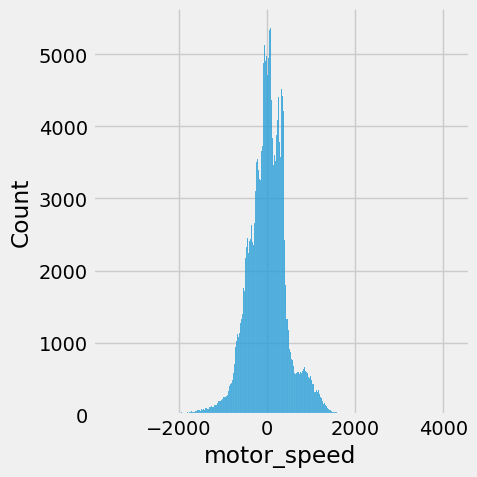

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import seaborn as sns

# Sample data
# Ensure X_train_scaled and y_train are defined
# X_train_scaled, y_train = ...

def predict(model, X_test):
    print('Model: {}'.format(model))

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error:', mse)

    r2 = r2_score(y_test, y_pred)
    print('R^2 Score:', r2)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print('Mean Absolute Error:', mae)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = mse ** 0.5
    print('Root Mean Squared Error:', rmse)

    sns.displot(y_test - y_pred)

# Fit the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate
predict(model, X_test_scaled)

# Save the model
filename = 'model.sav'
pickle.dump(model, open(filename, "wb"))

# Load the model
load_model = pickle.load(open(filename, "rb"))

# Ensure the loaded model is fitted
if hasattr(load_model, 'coef_'):
    r = load_model.score(X_test_scaled, y_test)
    print('Loaded model R^2 score:', r)
else:
    print('The loaded model is not fitted.')


In [38]:
from google.colab import files

# Save the model using pickle
filename = 'model.sav'
pickle.dump(model, open(filename, "wb"))

# Download the file to your local machine
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>